### Evaluating and visualizing NAAF-adjusted taxonomic peptide composition Trocas 8 non-incubations

#### Beginning with: class-level LCA assigments adjusted by NAAF factor in csv, manually created from LCA NAAF csvs

#### Goal: heatmaps and stacked bar plot peptide contributions for each station at both timepoints

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functools import reduce

In [2]:
# rearranged and condensed the csv manually in Libre Calc
# all peptide counts adjusted by NAAF numerators and sample denominator
# read in new csv:

MN = pd.read_csv("/home/millieginty/Documents/git-repos/amazon/analyses/T8-notincs/unipept/lca/NAAF/NMCP_phylum_naaf_sorted.csv", index_col=0)
MS = pd.read_csv("/home/millieginty/Documents/git-repos/amazon/analyses/T8-notincs/unipept/lca/NAAF/SMCP_phylum_naaf_sorted.csv", index_col=0)
BY = pd.read_csv("/home/millieginty/Documents/git-repos/amazon/analyses/T8-notincs/unipept/lca/NAAF/BY_phylum_naaf_sorted.csv", index_col=0)
CV = pd.read_csv("/home/millieginty/Documents/git-repos/amazon/analyses/T8-notincs/unipept/lca/NAAF/CV_phylum_naaf_sorted.csv", index_col=0)

MN_T = MN.transpose()
MS_T = MS.transpose()
BY_T = BY.transpose()
CV_T = CV.transpose()

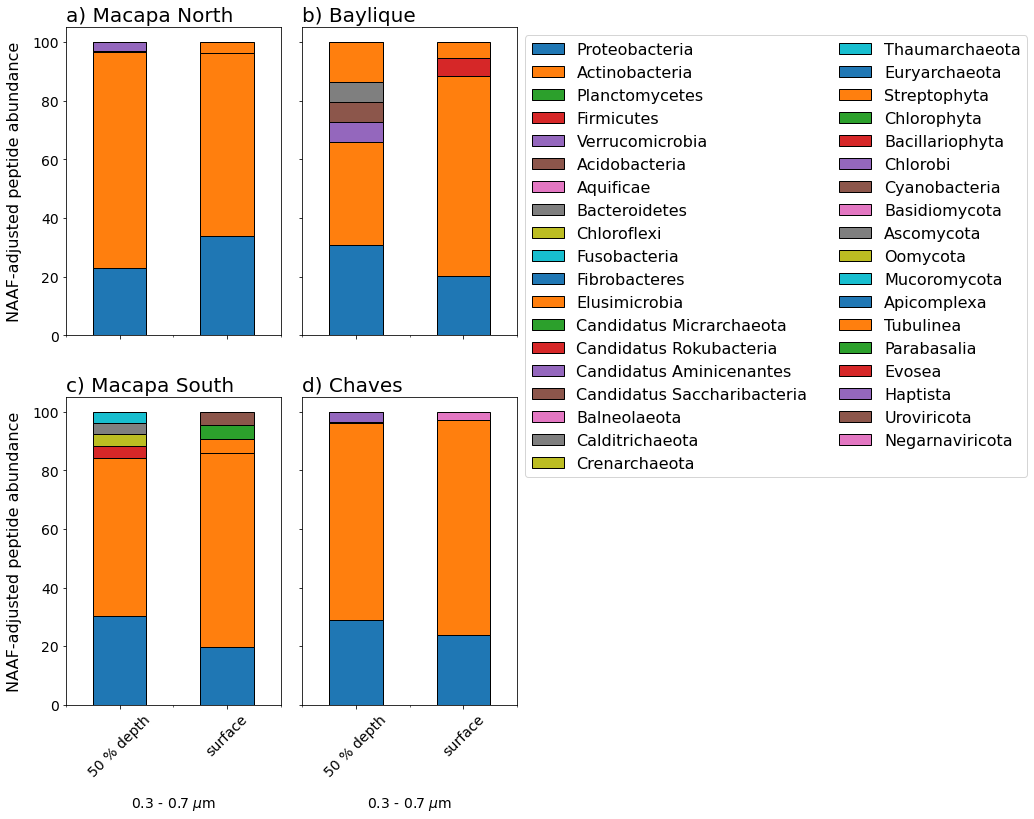

In [7]:
fig, axes = plt.subplots(figsize=(7, 10),nrows=2, ncols=2, sharex = True, sharey = True)

plt.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.2)

labels = ['50 % depth', 'surface']

sns.color_palette("hls", 8)

#  Macapa North
MN_T.plot(ax = axes[0,0], kind='bar', stacked=True, edgecolor = 'black')
axes[0,0].set_title('a) Macapa North', fontsize = 20, loc='left')
axes[0,0].set_ylabel("NAAF-adjusted peptide abundance", labelpad=10, fontsize = 16)
axes[0,0].set_xticklabels(labels, rotation = 45)
axes[0,0].get_legend().remove()
axes[0,0].tick_params(axis='y', labelsize= 14)


#  Baylique
BY_T.plot(ax = axes[0,1], kind='bar', stacked=True, edgecolor = 'black')
axes[0,1].set_title('b) Baylique', fontsize = 20, loc='left')
axes[0,1].get_legend().remove()
axes[0,1].tick_params(axis='y', labelsize= 14)
#axes[0,1].legend(bbox_to_anchor=(1,1), loc="upper left", fontsize = 14, ncol = 2)

#  Macapa South
MS_T.plot(ax = axes[1,0], kind='bar', stacked=True, edgecolor = 'black')
axes[1,0].set_title('c) Macapa South', fontsize = 20, loc='left')
axes[1,0].set_ylabel("NAAF-adjusted peptide abundance", labelpad=10, fontsize = 16)
axes[1,0].get_legend().remove()
axes[1,0].set_xticklabels(labels, rotation = 45, fontsize = 14)
axes[1,0].tick_params(axis='y', labelsize= 14)
axes[1,0].set_xlabel('0.3 - 0.7 $\mu$m', fontsize = 14, labelpad = 16)

#  Chaves
CV_T.plot(ax = axes[1,1], kind='bar', stacked=True, edgecolor = 'black')
axes[1,1].set_title('d) Chaves', fontsize = 20, loc='left')
axes[1,1].get_legend().remove()
axes[1,1].set_xticklabels(labels, rotation = 45, fontsize = 14)
axes[1,1].tick_params(axis='y', labelsize= 14)
axes[1,1].set_xlabel('0.3 - 0.7 $\mu$m', fontsize = 14, labelpad = 16)

#handles, labels = axes[0,1].get_legend_handles_labels()
#axes[0,1].legend(handles[::-1], labels[::-1], bbox_to_anchor=(1,1), loc="upper left", fontsize = 12, ncol = 2)

handles, labels = axes[0,1].get_legend_handles_labels()
axes[0,1].legend(handles[::1], labels[::1], bbox_to_anchor=(1,1), loc="upper left", fontsize = 16, ncol = 2);

### Make plots of just the major players: Proteo, Actin, Plancto

In [11]:
# made dfs for each station that are just these top three phyla

MN_maj = MN_T[['Proteobacteria', 'Actinobacteria', 'Planctomycetes', 'Cyanobacteria', 'Streptophyta', 'Ascomycota']].copy()
MS_maj = MS_T[['Proteobacteria', 'Actinobacteria', 'Planctomycetes', 'Cyanobacteria', 'Streptophyta', 'Ascomycota']].copy()
BY_maj = BY_T[['Proteobacteria', 'Actinobacteria', 'Planctomycetes', 'Cyanobacteria', 'Streptophyta', 'Ascomycota']].copy()
CV_maj = CV_T[['Proteobacteria', 'Actinobacteria', 'Planctomycetes', 'Cyanobacteria', 'Streptophyta', 'Ascomycota']].copy()

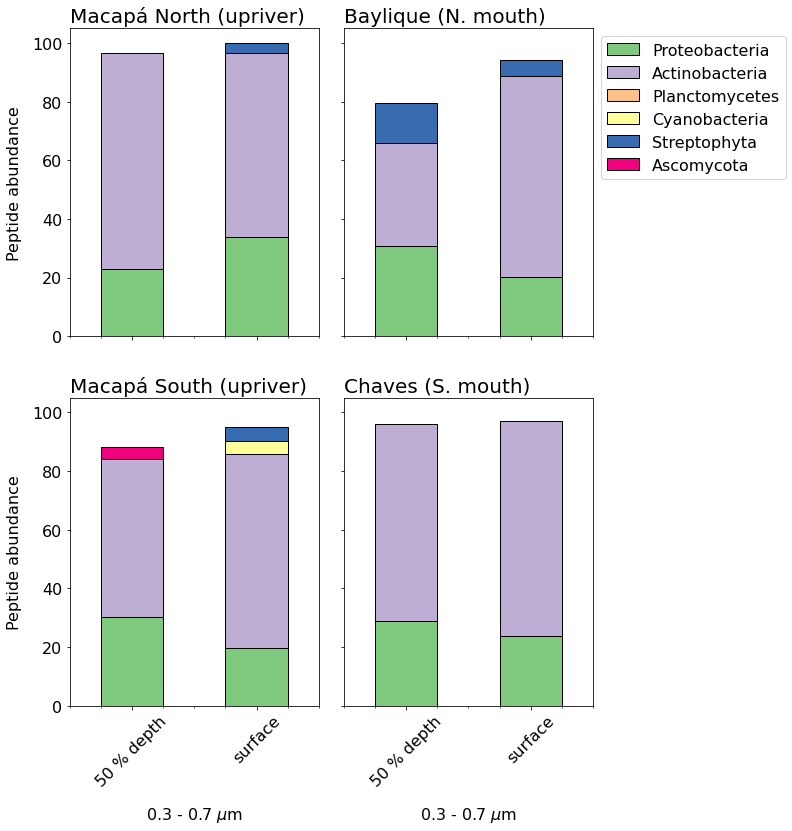

In [15]:
fig, axes = plt.subplots(figsize=(8, 10),nrows=2, ncols=2, sharex = True, sharey = True)

plt.tight_layout()

labels = ['50 % depth', 'surface']

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.2)

colors = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f']

#  Macapa North
MN_maj.plot(ax = axes[0,0], kind='bar', stacked=True, color = colors, edgecolor = 'black')
axes[0,0].set_title('Macapá North (upriver)', fontsize = 20, loc='left')
axes[0,0].set_ylabel("Peptide abundance", labelpad=10, fontsize = 16)
axes[0,0].set_xticklabels(labels, rotation = 45)
axes[0,0].get_legend().remove()
axes[0,0].tick_params(axis='y', labelsize= 16)


#  Baylique
BY_maj.plot(ax = axes[0,1], kind='bar', stacked=True, color = colors, edgecolor = 'black')
axes[0,1].set_title('Baylique (N. mouth)', fontsize = 20, loc='left')
axes[0,1].get_legend().remove()
axes[0,1].tick_params(axis='y', labelsize= 16)
#axes[0,1].legend(bbox_to_anchor=(1,1), loc="upper left", fontsize = 14, ncol = 2)

#  Macapa South
MS_maj.plot(ax = axes[1,0], kind='bar', stacked=True, color = colors, edgecolor = 'black')
axes[1,0].set_title('Macapá South (upriver)', fontsize = 20, loc='left')
axes[1,0].set_ylabel("Peptide abundance", labelpad=10, fontsize = 16)
axes[1,0].get_legend().remove()
axes[1,0].set_xticklabels(labels, rotation = 45, fontsize = 16)
axes[1,0].tick_params(axis='y', labelsize= 16)
axes[1,0].set_xlabel('0.3 - 0.7 $\mu$m', fontsize = 16, labelpad = 16)

#  Chaves
CV_maj.plot(ax = axes[1,1], kind='bar', stacked=True, color = colors, edgecolor = 'black')
axes[1,1].set_title('Chaves (S. mouth)', fontsize = 20, loc='left')
axes[1,1].get_legend().remove()
axes[1,1].set_xticklabels(labels, rotation = 45, fontsize = 16)
axes[1,1].tick_params(axis='y', labelsize= 16)
axes[1,1].set_xlabel('0.3 - 0.7 $\mu$m', fontsize = 16, labelpad = 16)

#handles, labels = axes[0,1].get_legend_handles_labels()
#axes[0,1].legend(handles[::-1], labels[::-1], bbox_to_anchor=(1,1), loc="upper left", fontsize = 12, ncol = 2)


handles, labels = axes[0,1].get_legend_handles_labels()
axes[0,1].legend(handles[::1], labels[::1], bbox_to_anchor=(1,1), loc="upper left", \
                 fontsize = 16, ncol = 1);

#fig.savefig('/home/millieginty/Documents/git-repos/2017-etnp/data/thesis-talk/amazon-all-station-class.png', facecolor=fig.get_facecolor(), transparent=True, dpi=300, bbox_inches = "tight")